In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [149]:
df=pd.read_excel('strdata.xlsx')

In [150]:
df.head()

,id,gender,age,heart_disease,ever_married,work_type,residence_type,smoking_status,systolic,diastolic,diabetes,family_histroy,alchohol,BMI,high_cholesterol,avg_glucose_level,slep_apnea,other_Risk,risk_classification,Risk classifaction
0,51676,1,3,1,0,0,1,1,0.000000,0.818182,2,0,2,0.00000,0.181818,0.000000,2,2,16.000000,Moderate_Risk
1,31112,2,2,0,0,0,0,3,1.000000,0.909091,2,3,3,0.00000,0.181818,0.927273,1,2,21.018182,Moderate_Risk
2,60182,1,3,1,0,0,0,3,0.363636,0.545455,3,0,1,1.00000,0.181818,0.727273,3,3,20.818182,High_Risk
3,1665,2,2,0,0,0,1,1,0.181818,0.727273,3,0,2,1.00000,0.181818,0.927273,2,2,18.018182,Moderate_Risk
4,56669,2,0,0,0,0,0,0,0.181818,0.727273,2,3,2,0.56087,0.181818,0.000000,2,1,13.651779,Low_Risk


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='other_Risk', ylabel='count'>

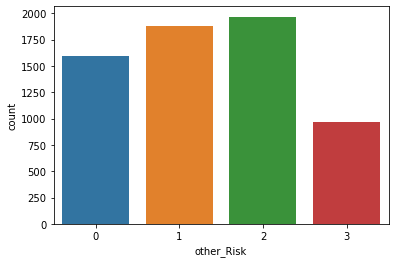

In [151]:
sns.countplot('other_Risk',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

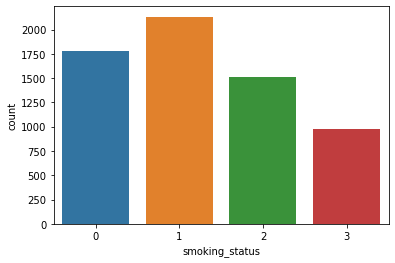

In [152]:
sns.countplot('smoking_status',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='family_histroy', ylabel='count'>

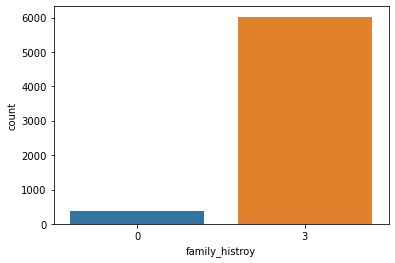

In [153]:
sns.countplot('family_histroy',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slep_apnea', ylabel='count'>

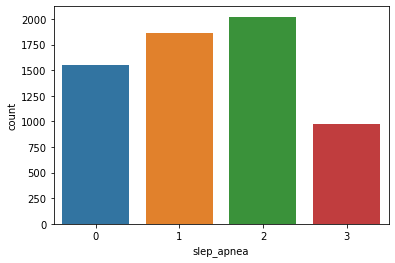

In [154]:
sns.countplot('slep_apnea',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

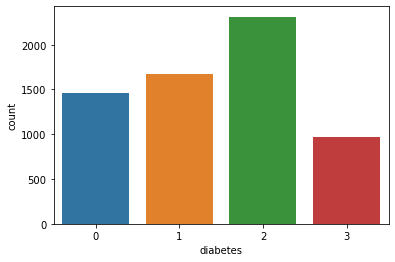

In [155]:
sns.countplot('diabetes',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk classifaction ', ylabel='count'>

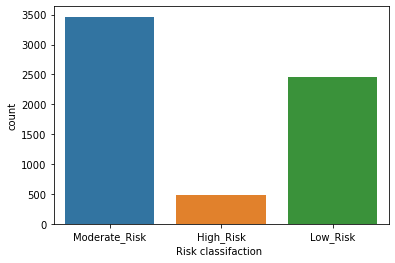

In [156]:
sns.countplot('Risk classifaction ',data=df)

In [157]:
df['Risk classifaction '].unique()

array(['Moderate_Risk', 'High_Risk', 'Low_Risk'], dtype=object)

In [158]:
df.drop('id', inplace=True, axis=1)
df.drop('risk_classification', inplace=True, axis=1)
df.drop('residence_type', inplace=True, axis=1)
df.drop('ever_married', inplace=True, axis=1)


In [159]:
df.head(3)

,gender,age,heart_disease,work_type,smoking_status,systolic,diastolic,diabetes,family_histroy,alchohol,BMI,high_cholesterol,avg_glucose_level,slep_apnea,other_Risk,Risk classifaction
0,1,3,1,0,1,0.000000,0.818182,2,0,2,0.0,0.181818,0.000000,2,2,Moderate_Risk
1,2,2,0,0,3,1.000000,0.909091,2,3,3,0.0,0.181818,0.927273,1,2,Moderate_Risk
2,1,3,1,0,3,0.363636,0.545455,3,0,1,1.0,0.181818,0.727273,3,3,High_Risk


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               6410 non-null   int64  
 1   age                  6410 non-null   int64  
 2   heart_disease        6410 non-null   int64  
 3   work_type            6410 non-null   int64  
 4   smoking_status       6410 non-null   int64  
 5   systolic             6410 non-null   float64
 6   diastolic            6410 non-null   float64
 7   diabetes             6410 non-null   int64  
 8   family_histroy       6410 non-null   int64  
 9   alchohol             6410 non-null   int64  
 10  BMI                  6410 non-null   float64
 11  high_cholesterol     6410 non-null   float64
 12  avg_glucose_level    6410 non-null   float64
 13  slep_apnea           6410 non-null   int64  
 14  other_Risk           6410 non-null   int64  
 15  Risk classifaction   6410 non-null   o

In [161]:
df.shape

(6410, 16)

In [162]:
df.isnull().sum()

gender                 0
age                    0
heart_disease          0
work_type              0
smoking_status         0
systolic               0
diastolic              0
diabetes               0
family_histroy         0
alchohol               0
BMI                    0
high_cholesterol       0
avg_glucose_level      0
slep_apnea             0
other_Risk             0
Risk classifaction     0
dtype: int64

In [163]:
df.BMI.value_counts()

0.560870    2445
0.278261    1608
0.000000    1382
1.000000     975
Name: BMI, dtype: int64

In [164]:
df['Risk classifaction '].value_counts()

Moderate_Risk    3465
Low_Risk         2455
High_Risk         490
Name: Risk classifaction , dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk classifaction ', ylabel='count'>

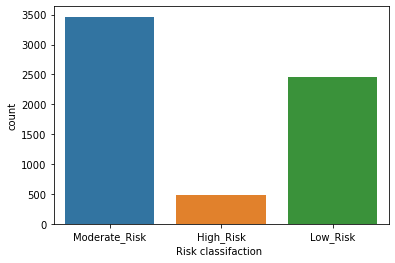

In [165]:
sns.countplot(df['Risk classifaction '])

In [166]:
# sns.countplot(df['heart_disease'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='count'>

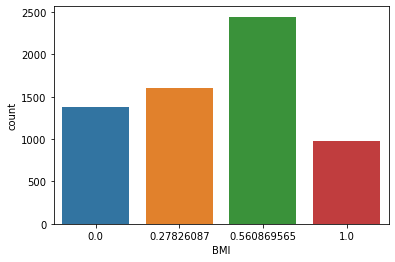

In [167]:
sns.countplot(df['BMI'])

In [168]:
df['Risk classifaction '].value_counts()

Moderate_Risk    3465
Low_Risk         2455
High_Risk         490
Name: Risk classifaction , dtype: int64

<AxesSubplot:>

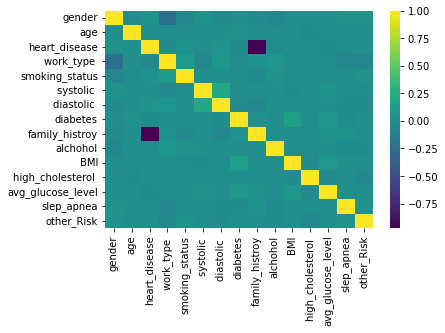

In [169]:
sns.heatmap(data=df.corr(),cmap='viridis')

C:\Users\HP\AppData\Local\Temp\ipykernel_1012\3778678186.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fg=df.groupby('Risk classifaction ')['age','heart_disease','work_type ','smoking_status','systolic ','diastolic ','diabetes','family_histroy','alchohol','BMI','high_cholesterol ','avg_glucose_level','slep_apnea','other_Risk'].mean()


<AxesSubplot:xlabel='Risk classifaction '>

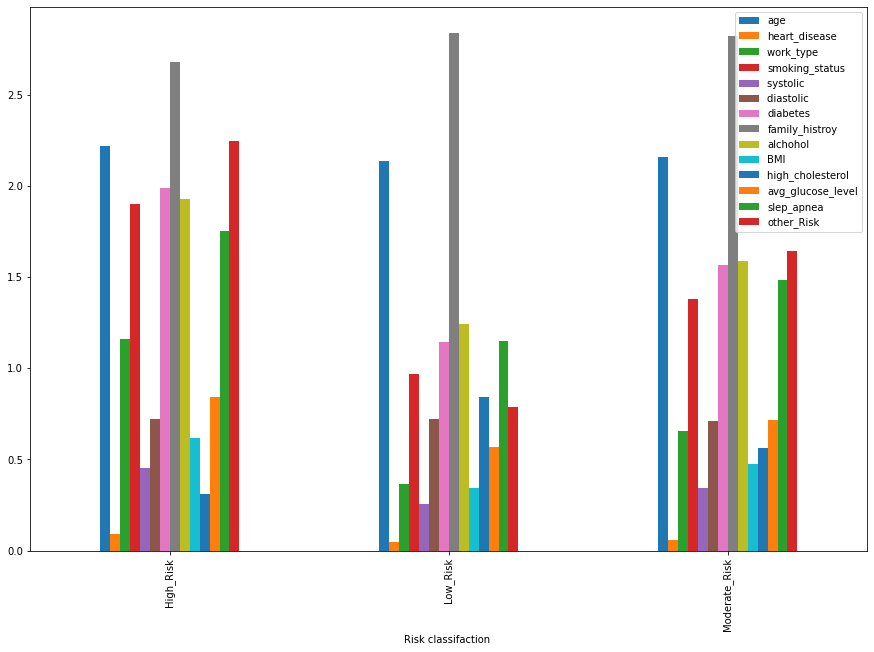

In [200]:
fg=df.groupby('Risk classifaction ')['age','heart_disease','work_type ','smoking_status','systolic ','diastolic ','diabetes','family_histroy','alchohol','BMI','high_cholesterol ','avg_glucose_level','slep_apnea','other_Risk'].mean()
fg.plot(kind='bar',figsize=(15,10))


In [ ]:
df['Risk classifaction ']=df['Risk classifaction '].replace({'Low_Risk':0,'Moderate_Risk':1,'High_Risk':2})

In [25]:
df.to_csv('mydata', index=False)

In [26]:
df['gender'].value_counts()

1    3326
2    3084
Name: gender, dtype: int64

In [27]:
df.info()
df['Risk classifaction '].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               6410 non-null   int64  
 1   age                  6410 non-null   int64  
 2   heart_disease        6410 non-null   int64  
 3   work_type            6410 non-null   int64  
 4   smoking_status       6410 non-null   int64  
 5   systolic             6410 non-null   float64
 6   diastolic            6410 non-null   float64
 7   diabetes             6410 non-null   int64  
 8   family_histroy       6410 non-null   int64  
 9   alchohol             6410 non-null   int64  
 10  BMI                  6410 non-null   float64
 11  high_cholesterol     6410 non-null   float64
 12  avg_glucose_level    6410 non-null   float64
 13  slep_apnea           6410 non-null   int64  
 14  other_Risk           6410 non-null   int64  
 15  Risk classifaction   6410 non-null   i

1    3465
0    2455
2     490
Name: Risk classifaction , dtype: int64

In [28]:
df.shape

(6410, 16)

In [29]:
df.tail()

,gender,age,heart_disease,work_type,smoking_status,systolic,diastolic,diabetes,family_histroy,alchohol,BMI,high_cholesterol,avg_glucose_level,slep_apnea,other_Risk,Risk classifaction
6405,1,3,0,2,0,0.000000,0.818182,2,3,0,0.56087,0.181818,0.927273,3,0,1
6406,1,2,0,2,3,0.363636,0.545455,0,3,0,0.00000,0.181818,0.000000,0,3,1
6407,1,3,0,2,3,0.181818,0.727273,2,3,2,0.56087,0.181818,0.927273,0,2,2
6408,1,3,0,2,0,0.181818,0.727273,2,3,2,0.56087,0.181818,0.927273,0,2,1
6409,1,2,0,2,1,0.363636,0.545455,2,3,2,0.56087,0.181818,0.927273,3,2,2


In [30]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [31]:
print(X.shape,Y.shape)

(6410, 15) (6410,)


In [32]:
Y

0       1
1       1
2       2
3       1
4       0
       ..
6405    1
6406    1
6407    2
6408    1
6409    2
Name: Risk classifaction , Length: 6410, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

In [46]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)

In [47]:
from collections import Counter
print('before smoting: ', Counter(y_train))
print('after smoting: ', Counter(y_train_smote))

before smoting:  Counter({1: 2412, 0: 1721, 2: 354})
after smoting:  Counter({2: 2412, 1: 2412, 0: 2412})


In [48]:
x_train_smote.shape

(7236, 15)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_smote,y_train_smote)
scores=cross_val_score(knn,x_train_smote,y_train_smote,cv=10,scoring='accuracy')
print(scores.mean())

0.8376223607895279


In [50]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(x_train, 2, mode='connectivity', include_self=True)
A.toarray()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [51]:
y_predK=knn.predict(x_test)

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predK))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       734
           1       0.79      0.61      0.69      1053
           2       0.40      0.73      0.52       136

    accuracy                           0.70      1923
   macro avg       0.63      0.72      0.65      1923
weighted avg       0.73      0.70      0.70      1923



C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


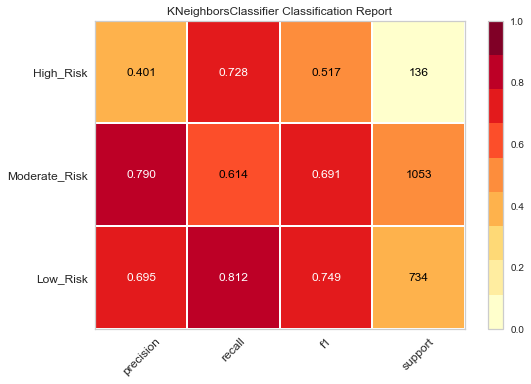

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [53]:
from yellowbrick.classifier import ClassificationReport
classes=['Low_Risk','Moderate_Risk','High_Risk']
vizualizer = ClassificationReport(knn, classes=classes, support=True)
vizualizer.fit(x_train_smote, y_train_smote)
vizualizer.score(x_test, y_test)
vizualizer.show()
#knn

C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


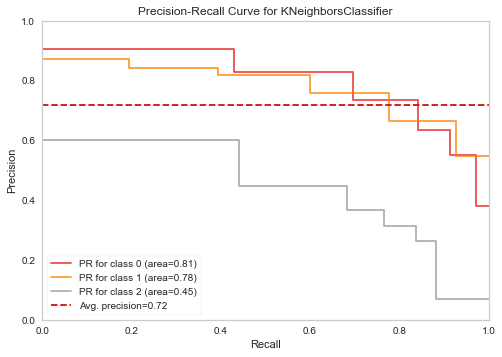

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
    KNeighborsClassifier(),
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_smote, y_train_smote)
viz.score(x_test,y_test)
viz.show()

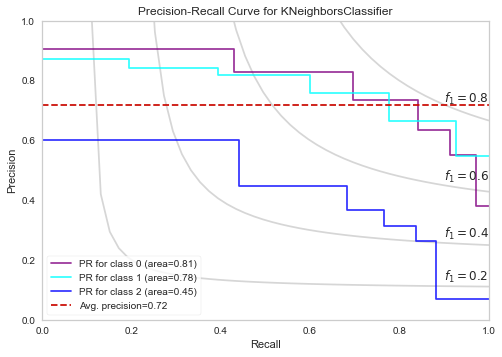

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
     KNeighborsClassifier(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(x_train_smote,y_train_smote)
viz.score(x_test, y_test)
viz.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
DTC=DecisionTreeClassifier(random_state=0)

In [58]:

DTC.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=0)

In [59]:
y_predD=DTC.predict(x_train)

In [60]:
score=accuracy_score(y_train,y_predD)

In [61]:
score

1.0

In [62]:
y_predD=DTC.predict(x_test)

In [63]:
score=accuracy_score(y_test,y_predD)
score

0.7394695787831513

In [64]:
pd.crosstab(y_test,y_predD)


col_0,0,1,2
Risk classifaction,,,
0,581,150,3
1,218,769,66
2,2,62,72


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


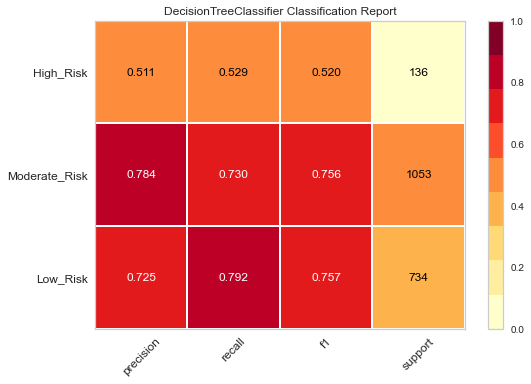

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [65]:
from yellowbrick.classifier import ClassificationReport
classes=['Low_Risk','Moderate_Risk','High_Risk']
vizualizer = ClassificationReport(DTC, classes=classes, support=True)
vizualizer.fit(x_train_smote, y_train_smote)
vizualizer.score(x_test, y_test)
vizualizer.show()


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
forest=RandomForestClassifier(n_estimators=300)

In [68]:
forest.fit(x_train_smote,y_train_smote)

RandomForestClassifier(n_estimators=300)

In [69]:
y_predF=forest.predict(x_train)

In [70]:
y_predF

array([2, 1, 1, ..., 0, 0, 1], dtype=int64)

In [71]:
score=accuracy_score(y_train,y_predF)
score

1.0

In [72]:
y_predF=forest.predict(x_test)

In [73]:
score=accuracy_score(y_test,y_predF)
print(score)
pd.crosstab(y_test,y_predF)

0.8543941757670307


col_0,0,1,2
Risk classifaction,,,
0,629,105,0
1,80,965,8
2,0,87,49


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predF))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       734
           1       0.83      0.92      0.87      1053
           2       0.86      0.36      0.51       136

    accuracy                           0.85      1923
   macro avg       0.86      0.71      0.75      1923
weighted avg       0.86      0.85      0.85      1923



In [75]:
from sklearn.ensemble import BaggingClassifier

In [76]:
bg=BaggingClassifier(max_samples=0.1,n_estimators=1000)

In [77]:
bg.fit(x_train_smote,y_train_smote)

BaggingClassifier(max_samples=0.1, n_estimators=1000)

In [78]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(),max_features=0.1,max_samples=0.1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.1,
                  max_samples=0.1)

In [79]:
bg.score(x_test,y_test)

0.8465938637545501

In [80]:
y_predB=forest.predict(x_test)

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predB))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       734
           1       0.83      0.92      0.87      1053
           2       0.86      0.36      0.51       136

    accuracy                           0.85      1923
   macro avg       0.86      0.71      0.75      1923
weighted avg       0.86      0.85      0.85      1923



C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


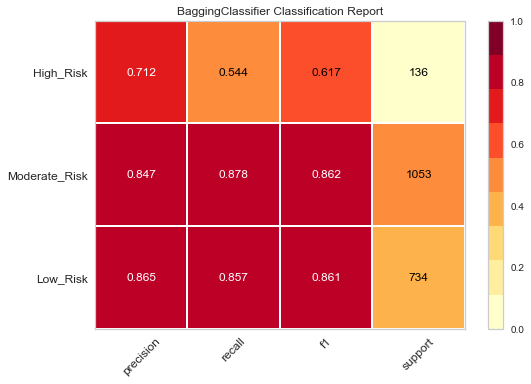

<AxesSubplot:title={'center':'BaggingClassifier Classification Report'}>

In [82]:
from yellowbrick.classifier import ClassificationReport
classes=['Low_Risk','Moderate_Risk','High_Risk']
vizualizer = ClassificationReport(bg, classes=classes, support=True)
vizualizer.fit(x_train_smote, y_train_smote)
vizualizer.score(x_test, y_test)
vizualizer.show()


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
mod=GradientBoostingClassifier(random_state=0, n_estimators=600)
mod.fit(x_train_smote,y_train_smote)
ypredG=mod.predict(x_test)
mod.score(x_test,y_test)

0.9089963598543942

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypredG))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       734
           1       0.90      0.94      0.92      1053
           2       0.83      0.66      0.73       136

    accuracy                           0.91      1923
   macro avg       0.89      0.84      0.86      1923
weighted avg       0.91      0.91      0.91      1923



C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


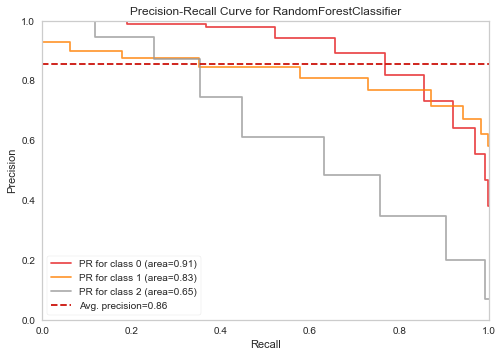

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_smote, y_train_smote)
viz.score(x_test,y_test)
viz.show()

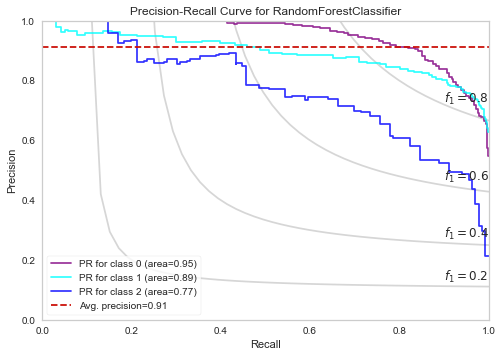

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    RandomForestClassifier(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(x_train_smote,y_train_smote)
viz.score(x_test, y_test)
viz.show()

C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


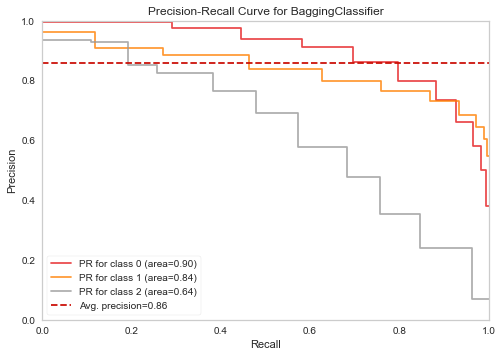

<AxesSubplot:title={'center':'Precision-Recall Curve for BaggingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
    BaggingClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_smote, y_train_smote)
viz.score(x_test,y_test)
viz.show()

C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


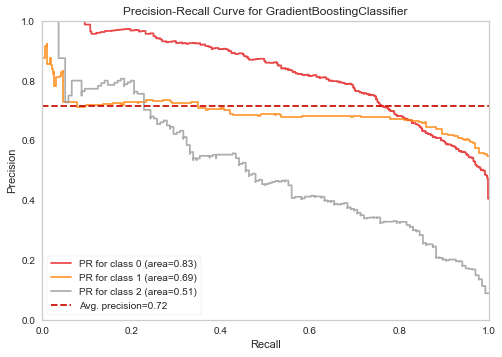

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
  GradientBoostingClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_smote, y_train_smote)
viz.score(x_test,y_test)
viz.show()

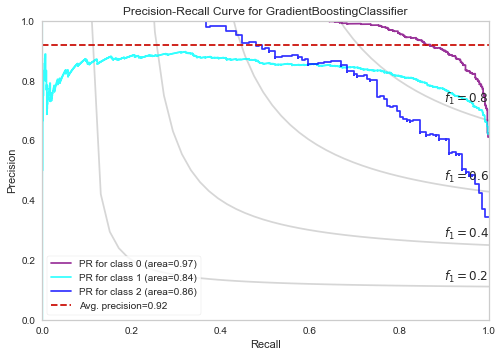

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [221]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
    GradientBoostingClassifier(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(x_train_smote,y_train_smote)
viz.score(x_test, y_test)
viz.show()

C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


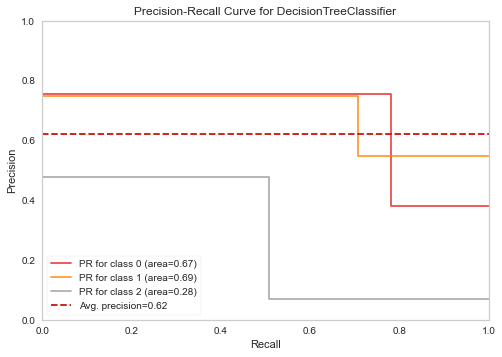

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
    DecisionTreeClassifier(),
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_smote, y_train_smote)
viz.score(x_test,y_test)
viz.show()

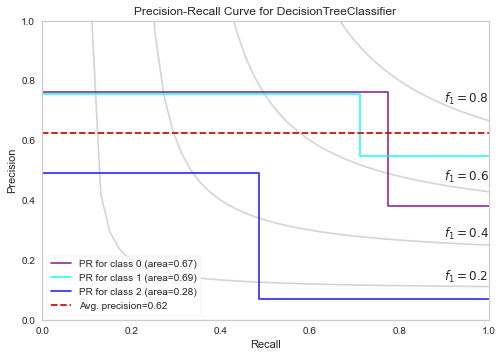

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    DecisionTreeClassifier(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(x_train_smote,y_train_smote)
viz.score(x_test, y_test)
viz.show()

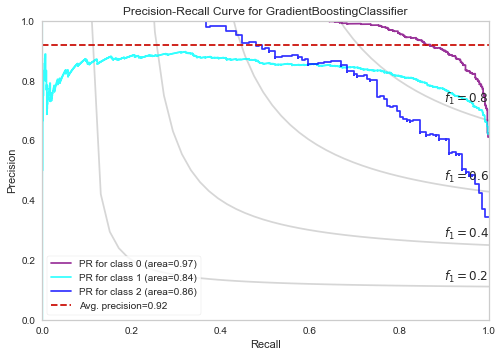

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [224]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    GradientBoostingClassifier(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(x_train_smote,y_train_smote)
viz.score(x_test, y_test)
viz.show()

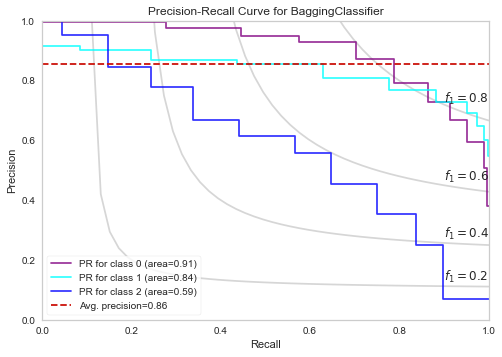

<AxesSubplot:title={'center':'Precision-Recall Curve for BaggingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [225]:
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    BaggingClassifier(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(x_train_smote,y_train_smote)
viz.score(x_test, y_test)
viz.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


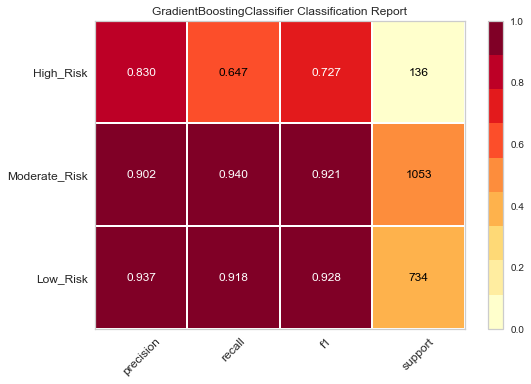

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [226]:
from yellowbrick.classifier import ClassificationReport
classes=['Low_Risk','Moderate_Risk','High_Risk']
vizualizer = ClassificationReport(mod, classes=classes, support=True)
vizualizer.fit(x_train_smote, y_train_smote)
vizualizer.score(x_test, y_test)
vizualizer.show()
#GradientBoosting

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


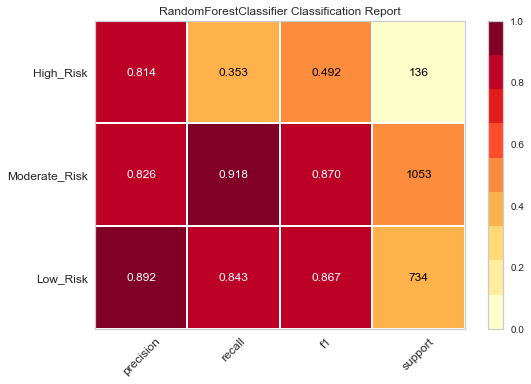

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [227]:
from yellowbrick.classifier import ClassificationReport
classes=['Low_Risk','Moderate_Risk','High_Risk']
vizualizer = ClassificationReport(forest, classes=classes, support=True)
vizualizer.fit(x_train_smote, y_train_smote)
vizualizer.score(x_test, y_test)
vizualizer.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


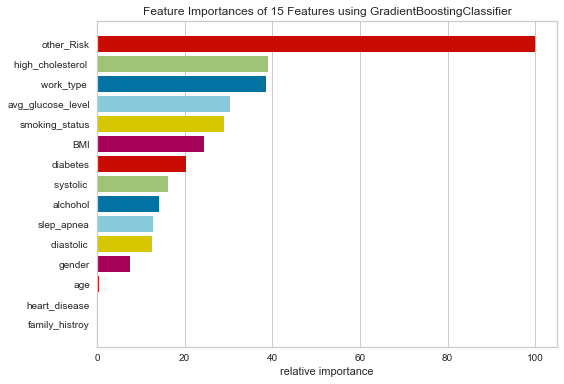

<AxesSubplot:title={'center':'Feature Importances of 15 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [228]:
from yellowbrick.model_selection import FeatureImportances
visualizer = FeatureImportances(mod)
visualizer.fit(x_train_smote, y_train_smote)
visualizer.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


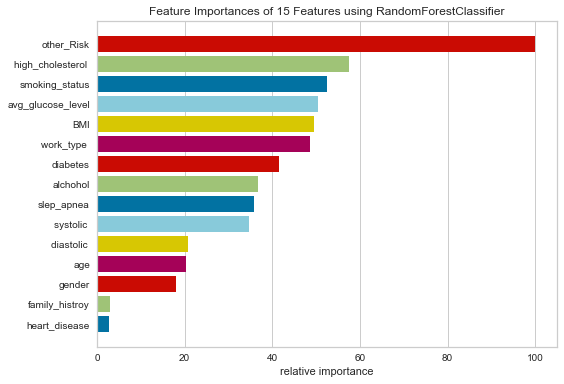

<AxesSubplot:title={'center':'Feature Importances of 15 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [229]:
from yellowbrick.model_selection import FeatureImportances
visualizer = FeatureImportances(forest)
visualizer.fit(x_train_smote, y_train_smote)
visualizer.show()

In [230]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [231]:
NB.fit(x_train_smote,y_train_smote)
ypred=NB.predict(x_train_smote)
score=accuracy_score(y_train_smote,ypred)
score

0.7936705362078497

In [232]:
NB.fit(x_train_smote,y_train_smote)
ypred=NB.predict(x_test)
score=accuracy_score(y_test,ypred)
score

0.7436297451898076

C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


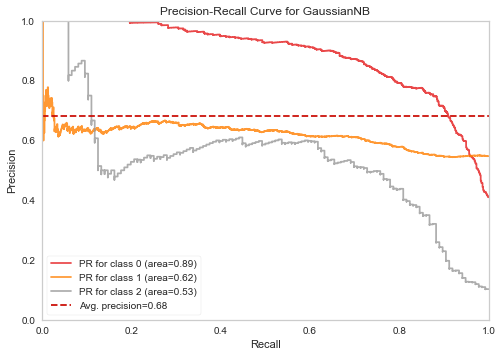

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB'}, xlabel='Recall', ylabel='Precision'>

In [233]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
    GaussianNB(),
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train_smote, y_train_smote)
viz.score(x_test,y_test)
viz.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


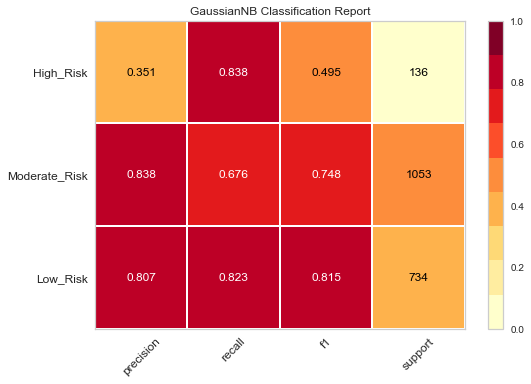

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [234]:
from yellowbrick.classifier import ClassificationReport
classes=['Low_Risk','Moderate_Risk','High_Risk']
vizualizer = ClassificationReport(NB, classes=classes, support=True)
vizualizer.fit(x_train_smote, y_train_smote)
vizualizer.score(x_test, y_test)
vizualizer.show()

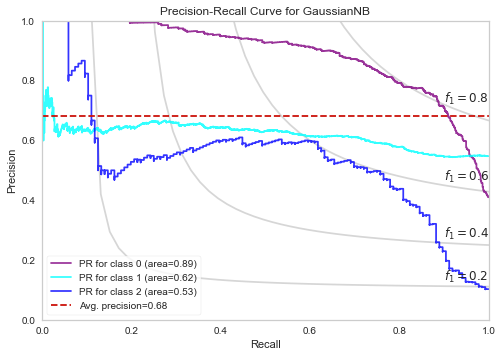

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB'}, xlabel='Recall', ylabel='Precision'>

In [235]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    GaussianNB(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(x_train_smote,y_train_smote)
viz.score(x_test, y_test)
viz.show()

In [236]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predF)
cm

array([[619, 115,   0],
       [ 75, 967,  11],
       [  0,  88,  48]], dtype=int64)

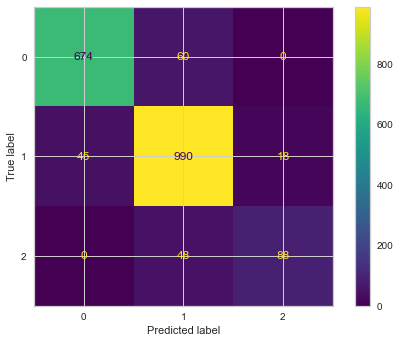

In [237]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mod,x_test,y_test)
#gradient boosting classifier

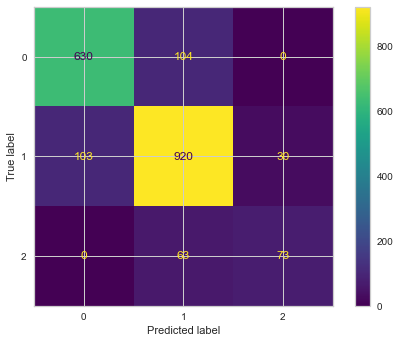

In [238]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bg,x_test,y_test)

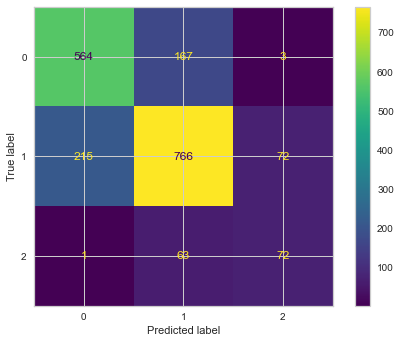

In [239]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(DTC,x_test,y_test)

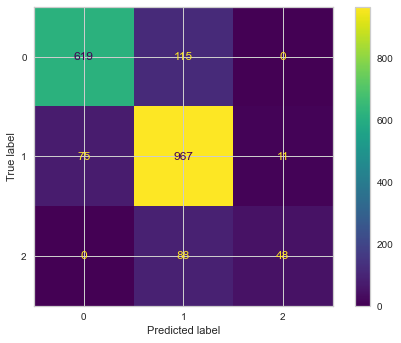

In [240]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(forest,x_test,y_test)

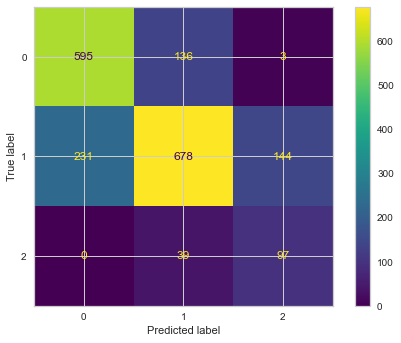

In [241]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn,x_test,y_test)

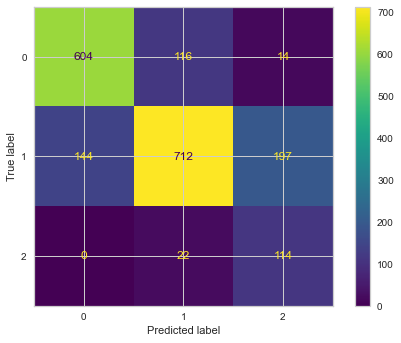

In [242]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(NB,x_test,y_test)

In [243]:
df.shape

(6410, 16)

In [244]:

input_data=[1,3,1,0,1,0.0,0.81818182,2,0,2,0.0,0.181818182,0.0,2,2]

data_to_array= np.asarray(input_data)

data_reshaped= data_to_array.reshape(1,-1)

prediction= model.predict(data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('the person has a  low risk of developing ischemic stroke')
if (prediction[0] == 1):
    print('the person has a moderate risk of developing ischemic stroke')
if (prediction[0] == 2):
    print('the person has a high risk developing ischemic stroke')

NameError: name 'model' is not defined

In [ ]:
import pickle
pickle.dump(mod, open('stk-mod.sav' , 'wb'))

In [ ]:

df.to_csv('test_prediction_data.csv',index=False)